In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

print("pandas version:", pd.__version__)
print('numpy version:',  np.__version__)
print('matplotlib version:',  matplotlib.__version__)

pandas version: 0.25.3
numpy version: 1.17.4
matplotlib version: 3.1.3


## Base

In [2]:
mic_base = pd.read_csv('Mic_base_dis_20201.csv',index_col=0)
mic_base.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,109.0,106.002540,103.63926,101.87726,100.955030,100.72695,100.26726,101.212920,101.923080,104.04901,...,177.872900,173.849150,170.159850,166.34482,162.898440,159.207120,154.571620,151.015080,147.706600,144.444920
Tax2,102.0,101.577190,101.18565,100.82947,100.528390,100.27731,100.07729,99.916930,98.845375,98.78145,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,114.0,110.605100,107.99525,106.04780,105.038500,104.72453,105.06416,105.813420,107.393470,109.25191,...,0.285565,0.195105,0.106479,0.10496,0.103016,0.101645,0.099597,0.097996,0.096056,0.094165
Tax4,95.0,94.151146,93.48675,93.02473,92.873880,92.99938,92.41960,93.037315,93.998520,95.14321,...,1.075705,1.070001,1.064285,1.05838,1.052607,1.047198,1.040860,1.034631,1.028606,1.022629
Tax5,117.0,116.050090,115.20816,114.48988,113.966965,113.61938,113.44936,113.414230,113.596000,113.88526,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
mic_base = mic_base/10000
mic_base.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0109,0.010600,0.010364,0.010188,0.010096,0.010073,0.010027,0.010121,0.010192,0.010405,...,0.017787,0.017385,0.017016,0.016634,0.016290,0.015921,0.015457,0.015102,0.014771,0.014444
Tax2,0.0102,0.010158,0.010119,0.010083,0.010053,0.010028,0.010008,0.009992,0.009885,0.009878,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0114,0.011061,0.010800,0.010605,0.010504,0.010472,0.010506,0.010581,0.010739,0.010925,...,0.000029,0.000020,0.000011,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000009
Tax4,0.0095,0.009415,0.009349,0.009302,0.009287,0.009300,0.009242,0.009304,0.009400,0.009514,...,0.000108,0.000107,0.000106,0.000106,0.000105,0.000105,0.000104,0.000103,0.000103,0.000102
Tax5,0.0117,0.011605,0.011521,0.011449,0.011397,0.011362,0.011345,0.011341,0.011360,0.011389,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


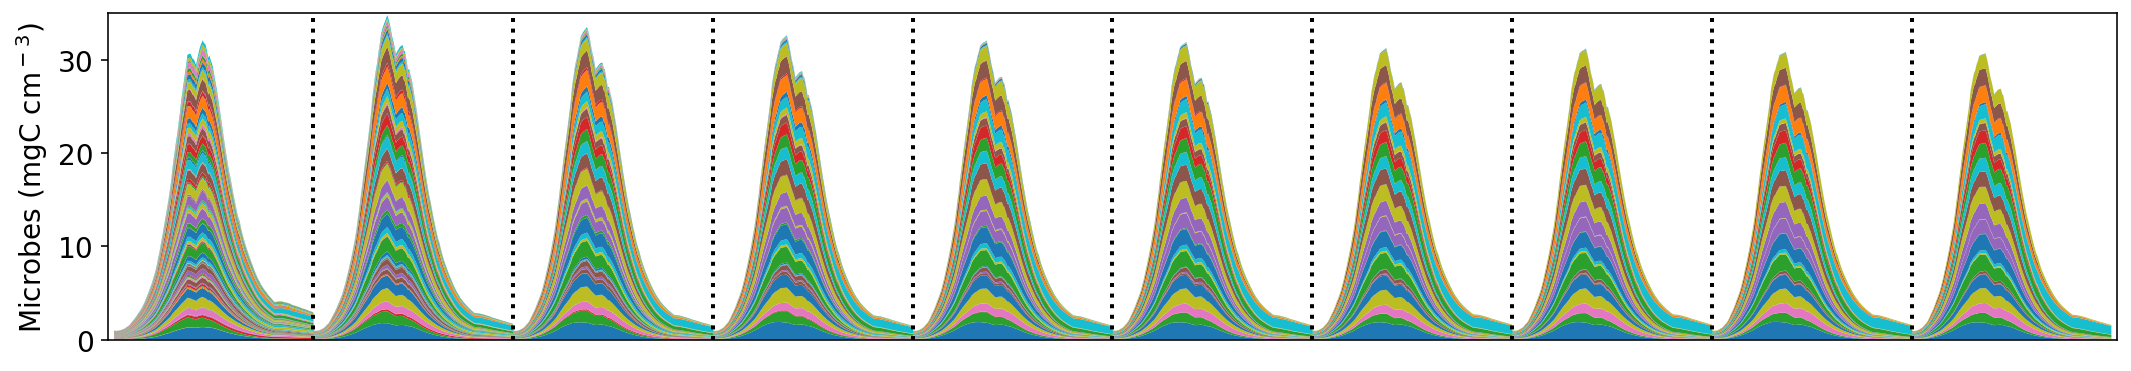

In [5]:
fig = plt.figure(figsize=(18,3))

ax1 = fig.add_subplot(111)

plt.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False)

plt.xlim(-10,365*10+10)
plt.ylim(0,35)
#plt.xlabel('Year',size=14)
plt.ylabel('Microbes (mgC cm$^-$$^3$)',size=14)

#plt.title('Base',size=14)  

plt.stackplot(range(1,365*10+1),mic_base.iloc[:,1:])

for i in range(9):
    if (i == 2) | (i==5):
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
    else:
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
        
        
#plt.savefig('microbes_base.pdf',bbox_inches='tight')

plt.show()

## basex10_dis

In [6]:
mic_basex10 = pd.read_csv('Mic_basex10_dis_20201.csv',index_col=0)
mic_basex10.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,109.0,106.002540,103.63926,101.87726,100.955030,100.72695,100.26726,101.212920,101.923080,104.04901,...,162.91590,159.449550,155.793530,151.873170,147.938340,145.009750,141.465290,137.076930,133.468900,129.27461
Tax2,102.0,101.577190,101.18565,100.82947,100.528390,100.27731,100.07729,99.916930,98.845375,98.78145,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Tax3,114.0,110.605100,107.99525,106.04780,105.038500,104.72453,105.06416,105.813420,107.393470,109.25191,...,0.28234,0.277023,0.271819,0.182468,0.179544,0.176905,0.173746,0.000000,0.000000,0.00000
Tax4,95.0,94.151146,93.48675,93.02473,92.873880,92.99938,92.41960,93.037315,93.998520,95.14321,...,32.46583,32.270653,32.076000,31.879004,31.685429,31.498674,31.295774,31.096664,30.902641,30.70977
Tax5,117.0,116.050090,115.20816,114.48988,113.966965,113.61938,113.44936,113.414230,113.596000,113.88526,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [7]:
mic_basex10 = mic_basex10/10000
mic_basex10.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0109,0.010600,0.010364,0.010188,0.010096,0.010073,0.010027,0.010121,0.010192,0.010405,...,0.016292,0.015945,0.015579,0.015187,0.014794,0.014501,0.014147,0.013708,0.013347,0.012927
Tax2,0.0102,0.010158,0.010119,0.010083,0.010053,0.010028,0.010008,0.009992,0.009885,0.009878,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0114,0.011061,0.010800,0.010605,0.010504,0.010472,0.010506,0.010581,0.010739,0.010925,...,0.000028,0.000028,0.000027,0.000018,0.000018,0.000018,0.000017,0.000000,0.000000,0.000000
Tax4,0.0095,0.009415,0.009349,0.009302,0.009287,0.009300,0.009242,0.009304,0.009400,0.009514,...,0.003247,0.003227,0.003208,0.003188,0.003169,0.003150,0.003130,0.003110,0.003090,0.003071
Tax5,0.0117,0.011605,0.011521,0.011449,0.011397,0.011362,0.011345,0.011341,0.011360,0.011389,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


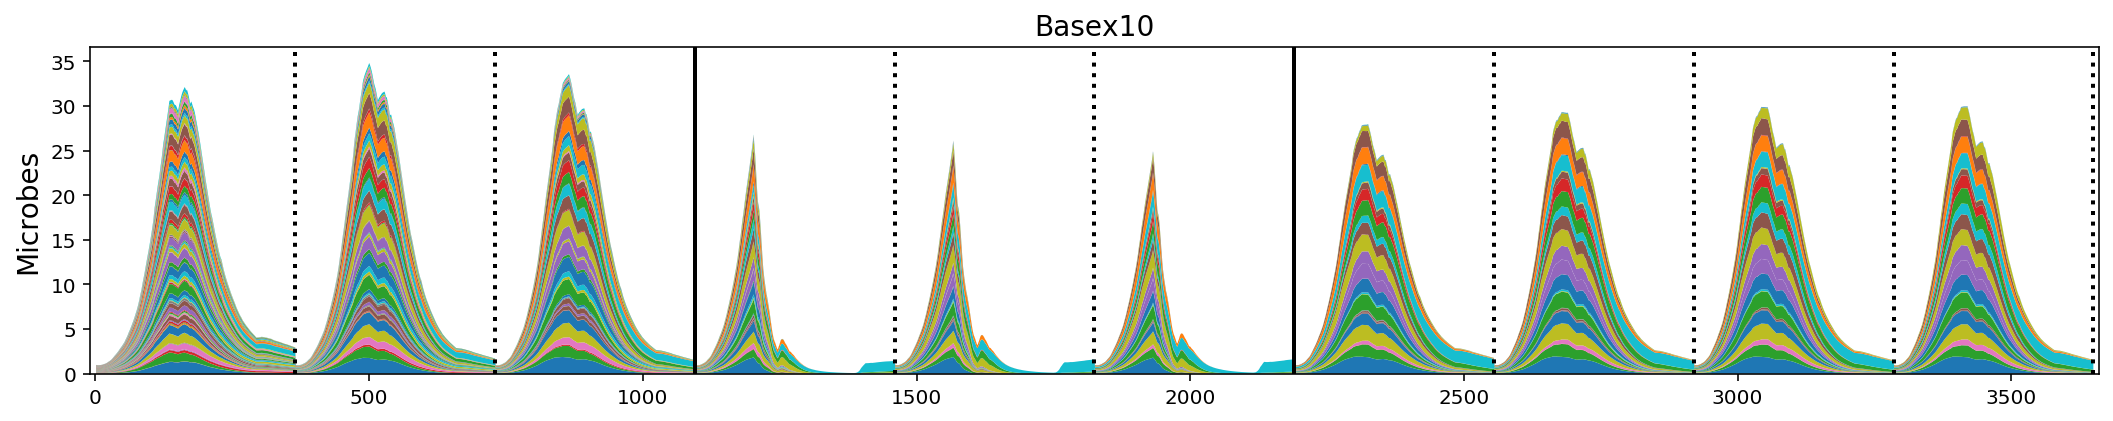

In [8]:
fig = plt.figure(figsize=(18,3))

ax1 = fig.add_subplot(111)
plt.ylabel('Microbes',size=14)
plt.xlim(-10,365*10+10)
plt.title('Basex10',size=14)  

plt.stackplot(range(1,365*10+1),mic_basex10.iloc[:,1:])

for i in range(10):
    if (i == 2) | (i==5):
        plt.axvline(x=365*(i+1),color='k',linestyle='-',lw=2)
    else:
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)

## Re-assembled Dataset of Year 3, 6, & 9

#### Visualization  1

In [9]:
index_3   = [i for i in range(365*2+1,365*3+1)]
index_6   = [i for i in range(365*5+1,365*6+1)]
index_9   = [i for i in range(365*8+1,365*9+1)]
index_369 = index_3 + index_6 + index_9

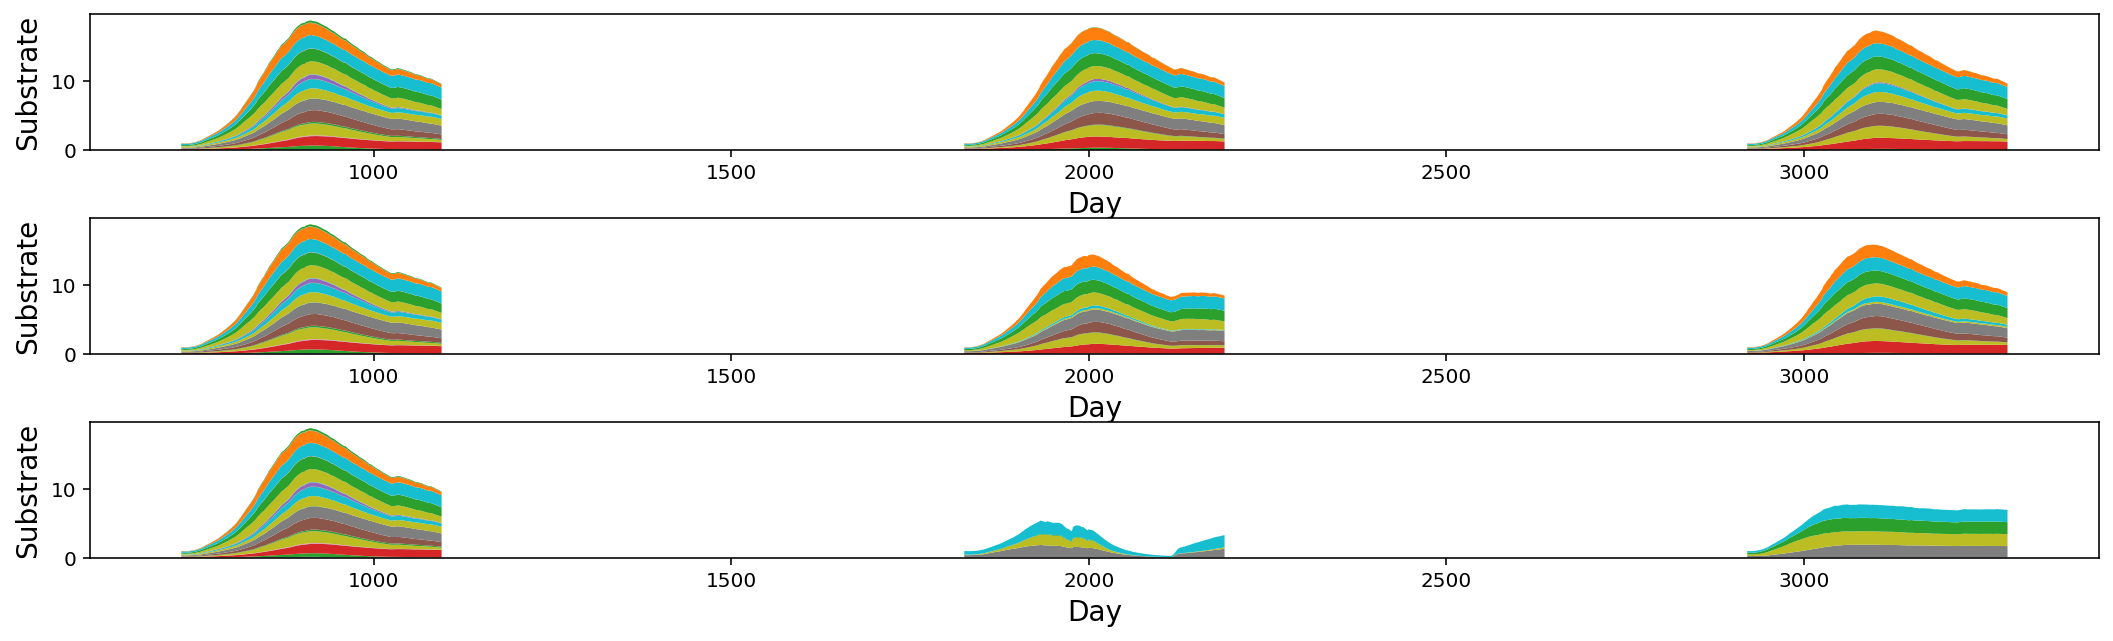

In [27]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(18,5))


ax1.stackplot(index_3,mic_base.iloc[:,index_3])
ax1.stackplot(index_6,mic_base.iloc[:,index_6])
ax1.stackplot(index_9,mic_base.iloc[:,index_9])
ax1.set_xlabel('Day',size=14)
ax1.set_ylabel('Substrate',size=14)

ax2.stackplot(index_3,mic_basex2.iloc[:,index_3])
ax2.stackplot(index_6,mic_basex2.iloc[:,index_6])
ax2.stackplot(index_9,mic_basex2.iloc[:,index_9])
ax2.set_xlabel('Day',size=14)
ax2.set_ylabel('Substrate',size=14)

ax3.stackplot(index_3,mic_basex10.iloc[:,index_3])
ax3.stackplot(index_6,mic_basex10.iloc[:,index_6])
ax3.stackplot(index_9,mic_basex10.iloc[:,index_9])
ax3.set_xlabel('Day',size=14)
ax3.set_ylabel('Substrate',size=14)


plt.subplots_adjust(hspace=0.5)

plt.show()

#### Visualization 2

**Make the 3 years stick together**

In [10]:
mic_base369    = mic_base.iloc[:,index_369]
#mic_basex2369  = mic_basex2.iloc[:,index_369]
#mic_basex4369  = mic_basex4.iloc[:,index_369]
mic_basex10369 = mic_basex10.iloc[:,index_369]

#mic_basex10_dis369 = mic_basex10_dis.iloc[:,index_369] # cumulative initialization
#mic_basex15369 = mic_basex15.iloc[:,index_369]
#mic_basex20369 = mic_basex20.iloc[:,index_369]

mic_base369.columns = mic_basex10369.columns = [i for i in range(1,365*3+1)]

In [11]:
mic_base369.head()

,1,2,3,4,5,6,7,8,9,10,...,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095
Tax1,0.048722,0.047545,0.046733,0.046289,0.046135,0.046067,0.046376,0.047020,0.047800,0.048980,...,0.017420,0.017063,0.016679,0.016322,0.015931,0.015628,0.015268,0.014892,0.014547,0.014224
Tax2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.031047,0.030312,0.029758,0.029361,0.029236,0.029275,0.029412,0.029658,0.030055,0.030695,...,0.000010,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000000,0.000000,0.000000
Tax4,0.008721,0.008662,0.008623,0.008613,0.008627,0.008665,0.008719,0.008802,0.008899,0.008922,...,0.001035,0.001029,0.001024,0.001018,0.001012,0.001007,0.001001,0.000995,0.000989,0.000984
Tax5,0.001289,0.001281,0.001274,0.001269,0.001267,0.001267,0.001268,0.001272,0.001277,0.001285,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


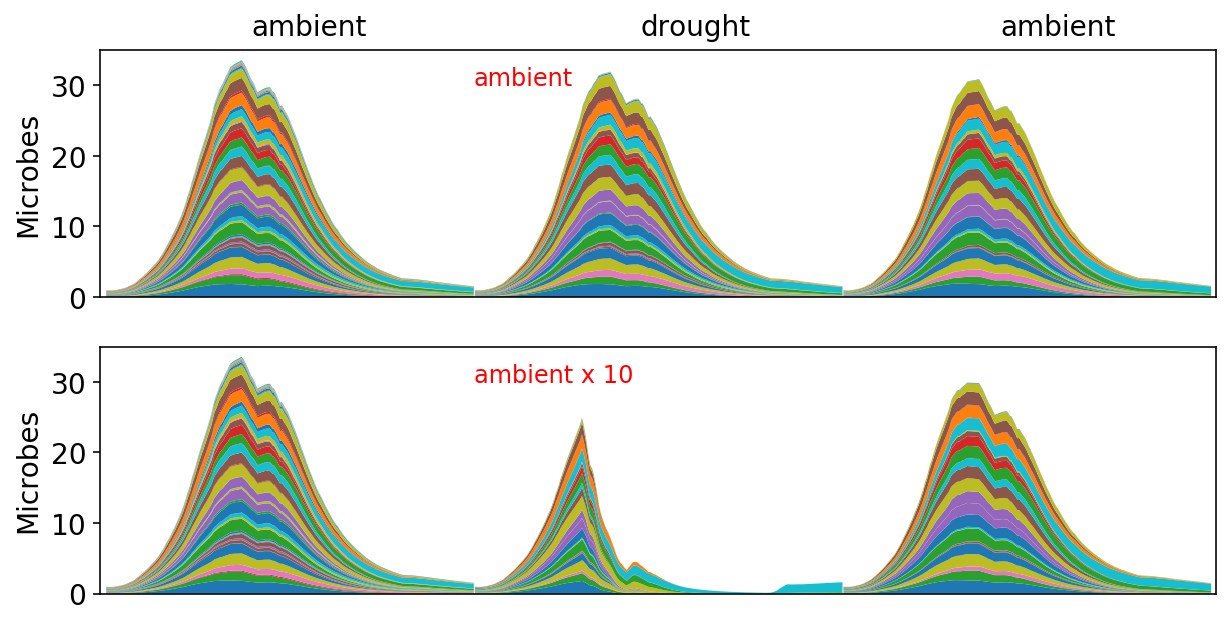

In [15]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,5))


ax1.set_xlim(-5,365*3+5)
ax1.set_ylim(-0,35)
#ax1.set_xlabel('Day',size=14)
ax1.set_ylabel('Microbes',size=14)
ax1.tick_params(bottom=False,labelbottom=False)    
ax1.yaxis.set_tick_params(labelsize=14)
ax1.text(365,30.0,'ambient',fontsize=12,c='r') #,ha='center', va='center')

ax1.stackplot(range(1,      365*1+1),mic_base369.iloc[:,0:365*1])
ax1.stackplot(range(365*1+1,365*2+1),mic_base369.iloc[:,365*1:365*2])
ax1.stackplot(range(365*2+1,365*3+1),mic_base369.iloc[:,365*2:365*3])


ax2.set_xlim(-5,365*3+5)
ax2.set_ylim(-0,35)
#ax2.set_xlabel('Day',size=14)
ax2.set_ylabel('Microbes',size=14)
ax2.tick_params(bottom=False,labelbottom=False)    
ax2.yaxis.set_tick_params(labelsize=14)
ax2.text(365,30.0,'ambient x 10',fontsize=12,c='r') #,ha='center', va='center')

ax2.stackplot(range(1,      365*1+1),mic_basex10369.iloc[:,0:365*1])
ax2.stackplot(range(365*1+1,365*2+1),mic_basex10369.iloc[:,365*1:365*2])
ax2.stackplot(range(365*2+1,365*3+1),mic_basex10369.iloc[:,365*2:365*3])


plt.figtext(0.23,0.9,'ambient',fontsize=14,weight='normal',c='k')
plt.figtext(0.50,0.9,'drought',fontsize=14,weight='normal',c='k')
plt.figtext(0.75,0.9,'ambient',fontsize=14,weight='normal',c='k')

plt.subplots_adjust(hspace=0.2)

plt.show()

## default + dispersal